# Tutorials


### MNIST

Resources:
- tensorflow docs for [MNIST tutorial](https://www.tensorflow.org/versions/master/tutorials/mnist/beginners/index.html)
- 3 notebooks that come with this docker image

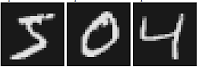

In [2]:
from IPython.display import Image
import base64
Image(data=base64.decodestring("iVBORw0KGgoAAAANSUhEUgAAAMYAAABFCAYAAAARv5krAAAYl0lEQVR4Ae3dV4wc1bYG4D3YYJucc8455yCSSIYrBAi4EjriAZHECyAk3rAID1gCIXGRgIvASIQr8UTmgDA5imByPpicTcYGY+yrbx+tOUWpu2e6u7qnZ7qXVFPVVbv2Xutfce+q7hlasmTJktSAXrnn8vR/3/xXmnnadg1aTfxL3/7rwfSPmT+kf/7vf098YRtK+FnaZaf/SS++OjNNathufF9caiT2v/xxqbTGki/SXyM1nODXv/r8+7Tb+r+lnxZNcEFHEG/e3LnpoINXSh/PWzxCy/F9eWjOnDlLrr/++jR16tQakgylqdOWTZOGFqX5C/5IjXNLjdt7/NTvv/+eTjnllLT//vunr776Kl100UVpueWWq8n10lOmpSmTU5o/f0Fa3DDH1ry9p0/++eefaZ999slYYPS0005LK664Yk2eJ02ekqZNnZx+XzA/LfprYgGxePHitOqqq6YZM2akyfPmzUvXXXddHceoic2EOckxDj300CzPggUL0g033NC3OKy00krDer3pppv6FgcBIjvGUkv9u5paZZVVhoHpl4Mvv/wyhfxDQ0NZ7H7EQbacPHny39Tejzj88ccfacqUKRmHEecYf0Nr8GGAQJ8gMHCMPlH0QMzmEBg4RnN4DVr3CQIDx+gTRQ/EbA6BgWM0h9egdZ8g8PeliD4RutfF/Ouvfz9OtZy8aNGiNH/+/GGWl1122XzseYuVNKtqsaI23Ghw0DYCA8doG8JqO+AUG2+8cVq4cGHaY4890vLLL5/WXXfdfI6jvPDCC3lJ8amnnkoezP3000/pl19+GThHtWpIPekYomTxFS7HnkqKjMsss0yGgFE4r62tSBFVJ02aNPyconi9V4/JwzHwT9ZNNtkkeZ6w5ZZbph133DH99ttv6ccff8zXX3nllcRRnHNfv2cNGMQWGRaOrWbUrjsGBRLAA6U4Lhoqw9h2223ztRBq6aWXzsbgvueffz4Lu9NOO2UnYTgrr7xy7tO9nOH111/Pbb744ov0ww8/jAvngAdFMvQDDjggG/0GG2yQX1GZNm1aziCCwzrrrJPl3muvvXKwePnll9M333wzHDCKWPbLMbuAkfISjnvvvXcW/emnn85lqCBqa4a65hiYR/Gk2RNGRlwm3n7ggQfmdrKD9sqJtdZaKxvCnDlz8n3Tp09PXmPYeuutc0SVNQjvnmuvvTa3efzxx9N33303PGZ5rF75DBvvqq233nrp22+/TWeddVbyikpgxCE4vQDhlQUBRfDw2esbs2fPTquvvnqviNN1PuIdJ4GErVx44YUZowsuuCB9+umn6eeff84BspmsWqljhPFDxjGGYx/lDkN33udajCoVlAjRzl4U8LjefRwnPjsXG8OJqKBd8NB1LTU5IHyCd7LJGOYXNoGjFqaGIKtrERDIDKtukfGMH/zRZa1A101+YBF44KfMYzO8VOYYjDWiukiGqc022yyXOUqdzTffPJ/z1ialeqNVxA9gi0wzlOJ5juJlR8JeddVV+ZrIKTq4ZvJp/8EHH+SU+txzz+W2SqmxVFZRplrH5DTRXmGFFdKuu+6azjjjjOzosl5g6D54CQCI4mGjhNQO5occckh2LvLTA6fqJOEnyhU6kNlkZmUuvrtNcFx77bUzhsZWXgoSsm6t4Dsa/tp2DErCmA04HAI4FLjaaqtlBhmnSKiNY4rDtHZFB6jFMMH0RVDH+nCPYxtDCFJnKkniRbDitWjTK3sykQUuMLPn3DZGX8SFnCG/fVyz5zCCBtIHTLshdzif8fERn8cKXxjCNOwCTu3Qf6yqhV4AQokiP489//zzM0DxnQYKwqAtIkko1kQzFFxvaNcJ6u3Pe+65J/cRRvDee+9lA2BInIyRff/997nNO++8k7t0vl2A6vHWynmyiPJ43WKLLbIijz/++LTddtvlTCdzwIWSg9yjxBJ0GN/DDz+c7zv77LOzbEceeWSekwVGgsOsWbNyNo0+qt7DfPvtt8/dmtvIGnPnzk3PPPPMsJ6rHrNef/BBeJA90RprrJEDcNhctMkXR/mnbccwuCjNGTbaaKMc8TBZprITxOdgOvbuKxqGz6LSJ598kseJ9Gi1CYmSv/76a3YyJZWMZJ6Ceskp8EMusihFEAyUmVaa8G2rxTNHIrd733///eH7YeaLNe5xrEzlWNF/HqQDf0Tm+GIbvYdD43MsKAIo/JDgE0G5aFfN8NaWYxiUshikqGYTTUSt0TCkjXsYNqJQQso+rgGa0vX58ccf56hQTtk+48F92rmvlnE1A0on2uKP0Yrw+Nxzzz0zn+ZhjKwRXq6vueaa2TmUiRQfS7SyNeMks9IV9vrvJOl/q622yo4Mfw5Pvm6TMclLdit6shh+YAMnq1E29tEsteUYBgMSgxa5MOAzJZcVXQs4bUR8XxhCHIwzMALCBuCcx5q0tF3u133l8XrRMchFiRYNyMxBKM/5IjZlWVzjULKwACISytIWFsi56aab5mvOKyEikmdAO/iHY+BDCRUZuoPD1e1akECyLseA7d13352DhdKak8Cmlt3U7TSl9p58FwejYK8ncAwKpDTnGDcARbWiAUjHiNEHsITSPlagpEZChcfrZzwSOfBOiQwXLuR3PjAhtwAD08iAMCO/a+5xPTIm3ALjwERf0V+c69QeT7ZujVdLDhgKBrANXAMreMESRkU7rdVPrXNtZ4xIpSLH1VdfnR3j4IMPzkbw2Wefpa+//jovo5188slZsZjArAcvFP3YY4+lSy+9NEdTdTTy0I5xHHfccfm1CH2LtuORKEqmkwVlVU+sBY+IdJRmE0zeeOONnEXuu+++7AhnnnlmWn/99XMJ5brtzTffzHMJx/o555xzkgdb0U8rRtAKrnTYqtG1Ml6teyxInHDCCdlGYByBmG2Z97ChVvFo2zEwbHCRTbqP7EDxPjN2pUBEe86AXAcsg+f10TYMSTvnRM1ulQe1wG/nHEXZZEJZUIYQ5cgWMsEgMgqclFdkdh+MbFFyuddnWMLNfTYkcuuXHlBkpFYNI3dS+mMMfCHHsZWadfUjmQVn8iLywscG21apMscQwR555JEM3KuvvpoZ5LHOmzgjAvBwzFt2/Oijj3Lm4Ayin/MU/eGHH+b2N998c/5MGSaZ44nw7OEd5Rx77LE5+1EehYXxkpes5li2K6+8Mhv8Lrvsko381ltvzcEBfvHQKh5auk9GPvHEE3NJAx+/eKL/HXbYIQcbK3nwN067xAk4s5VHdbvsx0nxrYQeKxJMZAfBA7GlRx99NC9EtCN7JY4RoPBeAHIAyrB3jpHYwqu1d02d7HpZcfqINo5dL7eJMXtxTzk2sgWFM/gcsnCakI2cFOk+523O+Qw7WaeYHYpYRp9xn4BkbPdWSfgJXYYM+ne+2xRj2sdx8EDu8rm4Ntp9pY4RSmb0CIPOAVNGoLA47yU4S2xen37ppZdy9CkLE/3lm8bJHzJbbiavt2Q9p7AkK7oyXAZOLk7gs9c4PJC0AOE8DDyrgJkaWgYQkSPYuAdpWySfteU8HhqKouYq+io6ZfGeZo7xpbT1+jt+jGULfprpq922ePHMBibwjWVq523KVrzBsIzTaMeu1DFi0HI0YyyYtAekY5MltbRyihFJiROBKIYTwMCTWJNubwdQFCXFapK9z96mtbjgs3thFKWnUgjBzNZIya5FOyUcPG36q4LwRgZ6Ix8HtBk3tirGGU0feAkslHfk5PzBh2cXSkvtWqWOOEaRGcoSHdXDMoYn1tK8yaON0ahbCWgFS/vxSnjn5F4ItLeiFAGAzCKc7MDA1OlIjc4pLFKE7FEyxb5ZPNTbtuiv2fvrtddfOFsYXcwj8d8qv/XGq3femLvvvnvOvrIYPPEjG+PDseDbDnXcMXiyiGiyyACOPvrovN95552zV3/++ef5zVveznlEo6CICvG5l/d4JSvHP+qoo7JjKDs4PkVSGPm9HSz9W5rlPEoCQYHjVFXyRGnBOcKA28VOP/qTBWX6YnS2IKB8qYL/enyGHPbKziOOOCLj6sGeslGW8L6Y4ANr2MY99fpsdL7jjmFwkSTSr6gDVCk+tmDQedcJ5LgdwaLPbu7xjJRRNlErSsiQhVHJlOEQoh182o1wRTnharwYs3itnWP9Rd/RD5mLW5yveh/YRhYMjItyBh/wjPat8tEVx6B00RKo5513XpIl7rzzzuwEourMmTOz95uIcyBfTSXYiy++mCOrSFS1klsFrNZ9eGPoJtmeyRx00EE5cpGbIi21XnbZZbkMee2117KMHIKMIVcotVb/vXoOz6I0+URoMlVFcBFE7L1+IjNYIo6v/fo+D3tC+FCR+FHuwNUCgfOtUlccI5hnJMoIBhN1sBICqMoNNaLP3pkiFGciIIBC4HaEbRWk0dyHb3Mp/EY0I6+NsytvyKxsKhpQr8ozGpm1IZ8IbV+PyllGuyh1YBXXOQEcy6R8M5eAHzuxxX3GRvbaCKJ4aRfXrjkG5jEbk00Prxi8SZTJKmc5/PDDc5v99tsvC+hBjWtqStmD0F4Ma1foMvDtfqZMUc3/lYjMSFFW3NS7JtyyoKzSiTocHoFJHMc+MlK7Mta7n9NbATJerbEYvQWIWCVitIyaXrV3nsG7H2Y2GVcbxyj6NX+waKEPmOvbfShwtjhQDDz5Ygt/uuoY+OPtnICDEMBTWsAQUu0NBBsDEgFEWOADAiDaVRERWsCq5i34IRN+TbTJgn8KwzOFuR4KDUXW7Kyik53Ep8w/+RkxWeO5S1EM5wVABguXMGp69dk1x87D0ObdL32GHI5tsDQGHtwbm/Hw4TpnKvNY5Ge0x113DEwT3tIsIdSnDIfxcxJAevCHfE9cXcmotHXfAw88kIFUdgFjLMn4HuZRuh9FExmjRCCnZxRqcPxz8ioUVk9eRhJkPAYHV8ZVFRkjjFSfAtw222yTy2OZ0iv15fHcQ4dKaMcwsBdEEL26RzaIh5+yK7LSBGPno8yOZX+vzRhfXzZ8cRrtyzzkzpr803XHwB8wTJYIRol+VY8zqMMBbP0f+cExE1qTdbU7x3jwwQdzVBYdesExKNiEWx2MfwoOAyCbJ9uRHZvUTcPmsENhGNE4HBKOHKNqZzQu3KNfX9H1nRABQZlbNkpt4SNo4DWIIesDj9qYnwki2giWqol3330348kZLPm7xvi1Pffcc7MzhA3gy/0oeIuxWtmPiWNgNCIFYwcCAa2FA1ikJZz1aeUVsBmge9TyoqGoIqKUFdEKCFXcU0/pHJizVMUnXBiBh6IicdTTzsEOnuZkDE/2rcJI4KMf/TF+0TucwDhkZ+DGL4/nGkPGV/AIC+2RvfP6ZPTI4gu5XNM/Um7RPzuIFyn1zW7wpQ9UHj+fbOHPmDlGCOGBGIeQQfwuq0jnISBQfOHft7JEHN94Q5xF6XLFFVfkyKIEGyuiGAo3r6BIx0imcM6k+6GHHspOEQbcDq+UTl4BwRu7PstUiPEJFsa9/PLL83nXg6d2xnUvoxS5L7744uGyh/wyRpRF9YwSHsHjE088kWWADQeRFThZkTgBstensZG5h4m56oEdcAp9CwTOVUlj6hgECcGBpA6XDazeiLKhVABQAhKB3cNxbEAL4KoEppm+gjf3OMafDf+UW7zeTL/ltqIiAxBMOIIxnLOHgbFsMGQ4InhE0nJfrXw2hnIRD3SFBKmYWDfqE49woFvOzZno3NxM0HDciMjBDsjEBgLTsJHYN+qjmWtj7hjBLKFFQgL7qRz14jHHHJPBcC2M3wRPVDT5ohzZRv0Z16O/sdozAKmdopUH5kftTrzJpl+lk29CcgpLw3BgpMbwwqF/S80pGJ6xO0WM+8Ybbxw2TuOEoTYakwyovB/JKdzDMVQOHvCRzXju890fL11aGhcMqqIxdwwCRkYQDZAaE7lWBhyosQEmQM439MgffDHm0Si8EcuBC0ezcQSZVKYktzFEW+3sfQ4natRvu9eMTS9F7IvHo+m/2fb6LNuCc0WsW+mzHq9j6hgE9YCHp5tkez2EAVjlMOmyUlU2Lis8ygVR0rykyoltPZCaOY9fr32Qp50X6xi7pWCGbsHBvwLgGIcddljGxvcsjOU1GseyiKjJQWydpiqNsBlei85BfhNxeJunVCl31x0jBOMAjJ9jRC3OEERDS7QMI0qQohIYgLSq7FJuMZbi9WZA7kRbvFAWx5Dyy449mjEDG/dyDPW4VSiy2iNvBcCSUdxyyy35OYHrqJUx843j8I/qQpA074BVVdR1x+AIHCIiIGewsqIuds41tSSlOxeOFHuOQ/E+2zPEuFYVKM32U3RMvGy44YbZMTg2B2+GOIXXJcjpR9lkUy/QyZ7GUU8zAD9RCiuR0oQYVv1IMAk7qFL+rjkGg7GZQPLufffdN69QKJtkCAKKjNGu1p7gMgWDYEDRpkpAmu0rnMLehie/RavcI49Sr1ZW0w6V91ac/IsxmdHPB0U5pQ+4+TExDudNUhPufnaKIn7N6m2k9h11jKLRqP+UQJb2eHh4uYjK0LW1D0MpCq0NR4g24RTR/0hCdvM6/m14FtljeTL4D/liedFeO7LYcyh7eMGDY8X16IM8Vp9kWjj2GwWG5IZb2FKVOHTMMTCvDKBgD2Z22223bNynnnpqVrZXBFxjQDZUFJiwIqKHN8qHO+64IxvN/fffn9vG/VWC0UpfeC5uZMEbg/ctM/8SzYOxZ599Nhs4ebSx0ECpcDFvMCdRggkesoQ+zaHU0N4EgAEnue2227JTON+LgaEVDFu5h+w2Wdl33GFkEUIQqYIqdYwwbJGO8q2xOydqUiTFWpJVPzsuUwhlzzFETxlGdFSCqaMB4XwvUzgKWU3AyW4uwFns4QMbilUyxbq8p/4cw3UEB8FDGQUDx/acqB8zRS2dw5qthe3VatPKucocg6JiYu3lP2nfawvekKVITzgJQLH24QTBtPZeE2D89957b27jwZ1IwIm8R2OMWHmJ+3pxTzaK8l+HyMrgTzrppMxqOIEsGoZvz0nsyWiliRMUl2G9aOk6POyLZVUvYtBpniL4wA1m9lVSW46BOQqKpTLK9FnUsxftvW4swssa4dkhCGFCMNfcp08lhM9KKc4h0obgsa8ShHb6Cv5DJnu8IwHB9TB852DkOlzIRV6kXbSVMfQj48BWdhE0TLr1Fe3zQR/+gRMK5yjuq4KjZccQ2SlYjexHmCnSkiLjtsesmlnpQ5naFo1A5GMAHoJxBI709ttv54ygntZWmWEcQMS9VQleRT9kNmfAG0P3HRPGbHnVudg4gEyJOAYiE0wikHAAcxHyxndO4KI/WHEK/Qzo7wjAXfaFNdurikaNtIERRTqmYIYdE2tGEs8hfJ8iFB/3xV67MCjG8NZbb6Unn3wyC+XfDxfnDxFp496qhK6qn5CDA5twK/fIRH5Gb0MMOhxCFgkKjOBoHqKEkmWvueaanG04iTHcP3CKQO0/e3ZhgceP2smqcKyKRuUYlEKhPDL+d5z1c4qVFTDnmBIZMwZ9DiKAzTmvCetPNFR7W7fXXt/KLddqTcyjr17bRybkEF5XiQhPHnMuDlF07MCB3I49l4EDxTrnfsFBJBxQbQSKeGoROqjdurWzIzoGJqRxS2KUf/rpp2flcRDRjRKVCdpFhCwz7rOVKE5z++235/7uuuuuXDq5P5yKEY0np8B3TKb9K1/vLTF0/7MiJtyRPYrq4fx+7R2e7vFDDzDyfx1goPwcUGMEYG/rFI3oGAYW0UUyimQIcRwGzbgpVsZAUTYE065xCtc5GUeSHTyg4kzKs/FKoSBljyhvTz6y2gseZAwlwgI+cNBGtpV9ZRj4BobjFY9O8g0bQcXWaRpxBE5hHuFnJ0XB6dOn56ge2QGDlK2dFSSG4b8kxVzEdSWGVxgYQLzrxJkIGgbTaUE73b9MZ/KNfIMOJpdcckndYZWmFAwv+wgydW/o8wsCK3xnz56dFzx8oxPGtk7QiI5h0FBaeGzRKYIpjDN2ig6lB9OiprmI60qNieIMIXvsQy7yotjH9eI+2hbPDY4bI8D+2JdnWTYY+iwDs78qaUTHEM0sI1pClAVMnqX9ImGQszB6DHoNOLzZNZlGRlEq9JNB9JOsRXvoxDGnsDTudwFUHTNmzMjDqEaU9xYvGgWiZnka0TEo16CeNyCM1SLtwmt5cNEoCOUa5xjQAIFWEGBP5rbKdTRr1qwcfGUMthXVTCt917pnRMdwE6ZiQm0JckADBMYCgWLwtXjTSeq/d5Y7ieag7wmDwMAxJowqB4JUicDAMapEc9DXhEFgcjxcM7vvR4on7bHS1q84WNkpUr/iEL+aOLRw4cIlQCmuIhUBmsjHlpQ9c7EmzjEsN1vd6DeCg8UVT+qRd7b6EQey8wMT+6El8RSu36xhIO8AgQYI9F94bADG4NIAgUDg/wHX+3lgThDIegAAAABJRU5ErkJggg=="), embed=True)